In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from cmcrameri import cm
from matplotlib import colors
import matplotlib.patches as patches
from scipy import signal
import peakutils
import math

In [2]:
precursor_id = 63178

In [3]:
before_df = pd.read_csv('/home/ubuntu/ms1-before-intensity-descent-precursor-{}.csv'.format(precursor_id))
after_df = pd.read_csv('/home/ubuntu/ms1-after-intensity-descent-precursor-{}.csv'.format(precursor_id))

In [4]:
before_df['normalised_intensity'] = before_df.intensity / before_df.intensity.max()
after_df['normalised_intensity'] = after_df.intensity / after_df.intensity.max()

In [5]:
metadata_df = pd.read_csv('/home/ubuntu/metadata-precursor-{}.csv'.format(precursor_id))
metadata_s = metadata_df.iloc[0]
metadata_s

Unnamed: 0                0.000000
precursor_id          63178.000000
window_mz_lower        1480.852318
window_mz_upper        1483.285443
wide_mz_lower          1479.848963
wide_mz_upper          1483.285443
window_scan_width        77.000000
fe_scan_lower           179.000000
fe_scan_upper           256.000000
wide_scan_lower         179.000000
wide_scan_upper         256.000000
wide_rt_lower          1907.966193
wide_rt_upper          1917.966193
fe_ms1_frame_lower    17042.000000
fe_ms1_frame_upper    17142.000000
fe_ms2_frame_lower             NaN
fe_ms2_frame_upper             NaN
wide_frame_lower      17042.000000
wide_frame_upper      17142.000000
number_of_windows         1.000000
Name: 0, dtype: float64

In [6]:
feature_df = pd.read_pickle('/data2/experiments/P3856/features-3did/exp-P3856-run-P3856_YHE211_1_Slot1-1_1_5104-features-3did.pkl')
if len(feature_df) > 0:
    feature_df = feature_df[(feature_df.precursor_id == precursor_id)]
    feature_df

In [7]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

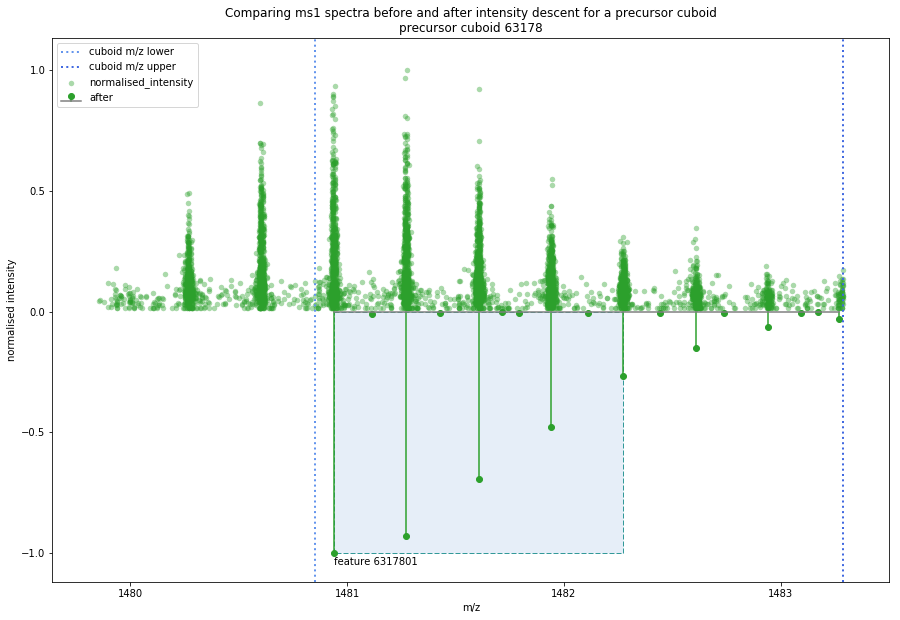

In [8]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# markerline, stemlines, baseline = ax.stem(before_df.mz, before_df.normalised_intensity, label='before')
# plt.setp(markerline, 'color', colors[1])
# plt.setp(stemlines, 'color', colors[1])
# plt.setp(baseline, 'color', colors[7])

ax.scatter(before_df.mz, before_df.normalised_intensity, marker='o', color='tab:green', lw=0, s=30, alpha=0.4)

markerline, stemlines, baseline = ax.stem(after_df.mz, -after_df.normalised_intensity, label='after')
plt.setp(markerline, 'color', colors[2])
plt.setp(stemlines, 'color', colors[2])
plt.setp(baseline, 'color', colors[7])

plt.xlabel('m/z')
plt.ylabel('normalised intensity')
f.set_figheight(10)
f.set_figwidth(15)

nearest = 1.0
range_l = round(before_df.mz.min() / nearest) * nearest
range_u = round(before_df.mz.max() / nearest) * nearest
plt.xticks(np.arange(range_l,range_u+nearest,nearest))

for idx,row in enumerate(feature_df.itertuples()):
    envelope = row.envelope
    feature_id = row.feature_id
    env_width = envelope[-1][0] - envelope[0][0]
    rect = patches.Rectangle((envelope[0][0],0),env_width,-1.0+(idx*0.05),linewidth=1,linestyle=(0,(5,2)),edgecolor=(0.2,0.6,0.6,1.0),facecolor=tuple(i/255. for i in tableau20[idx+1])+(0.3,),fill=True)
    ax.add_patch(rect)
    plt.text(envelope[0][0], -1.05, 'feature {}'.format(feature_id))

plt.axvline(x=metadata_s.window_mz_lower, linestyle=':', color='cornflowerblue', linewidth=2, label='cuboid m/z lower')
plt.axvline(x=metadata_s.window_mz_upper, linestyle=':', color='royalblue', linewidth=2, label='cuboid m/z upper')

plt.margins(0.06)
plt.legend(loc='best')
plt.title('Comparing ms1 spectra before and after intensity descent for a precursor cuboid\nprecursor cuboid {}'.format(precursor_id))
plt.show()